In [24]:
import os
# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Dask
# os.environ["MODIN_OUT_OF_CORE"] = "true"
from helper_functions import *
import pandas as pd
import numpy as np 
import seaborn as sns
import spacy
import glob
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import io
nlp = spacy.load("de_core_news_sm")
input_type = 'json'

# to_inspect = [filename.split('/')[1].split('_')[0] for filename in glob.glob("25022021_0010/*.json")]



In [16]:

to_inspect = inspect()
for i in inspect():
    print(f"{i}: {to_inspect[i]}")


0: ['Corona', '25022021_0010/Corona_ist_nicht_das_Problem_24022021_223221.json']
1: ['militaernews', '25022021_0010/militaernews_24022021_223551.json']
2: ['verbindediepunkte', '25022021_0010/verbindediepunkte_24022021_223622.json']
3: ['naomiseibt', '25022021_0010/naomiseibt_24022021_222209.json']
4: ['FreiheitsChatDE', '25022021_0010/FreiheitsChatDE_24022021_224119.json']
5: ['Dr', '25022021_0010/Dr_Heinrich_Fiechtner_24022021_223230.json']
6: ['FreieMedienTV', '25022021_0010/FreieMedienTV_24022021_223428.json']
7: ['StuttgartGrundgesetzdemos', '25022021_0010/StuttgartGrundgesetzdemos_24022021_223034.json']
8: ['KoronaAlarm', '25022021_0010/KoronaAlarm_24022021_223725.json']
9: ['MICHAELWENDLEROFFICIAL', '25022021_0010/MICHAELWENDLEROFFICIAL_24022021_223739.json']
10: ['ATTILAHILDMANN', '25022021_0010/ATTILAHILDMANN_2_24022021_223416.json']
11: ['Haintz', '25022021_0010/Haintz_24022021_223255.json']
12: ['ATTILAHILDMANN', '25022021_0010/ATTILAHILDMANN_24022021_222224.json']
13: ['Xav

naomiseibt: 25022021_0010/naomiseibt_24022021_222209.json
Preparation finished..


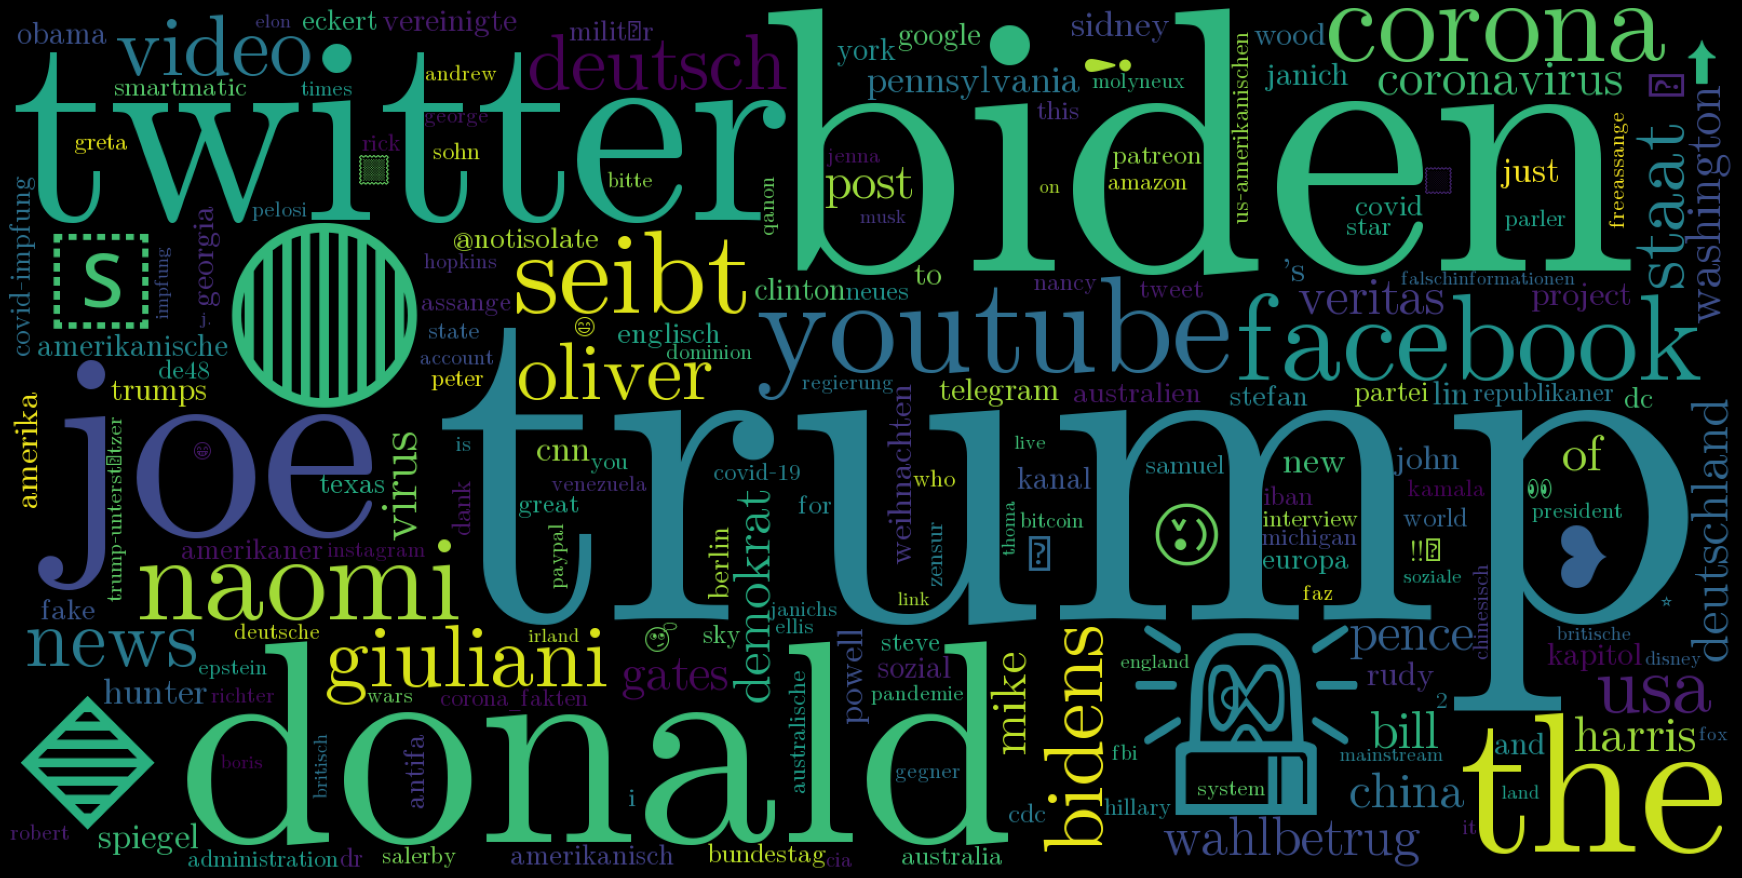

In [28]:

selector = 3
wordcloud_switch = False

dataframe = to_inspect[selector][0]
filepath = to_inspect[selector][1]
print(f"{dataframe}: {filepath}")
prepare_dataframe(filepath, 'json')
generate_wordcloud(current_df)


In [30]:
tokens_sum(current_df)

NameError: name 'dataframe' is not defined

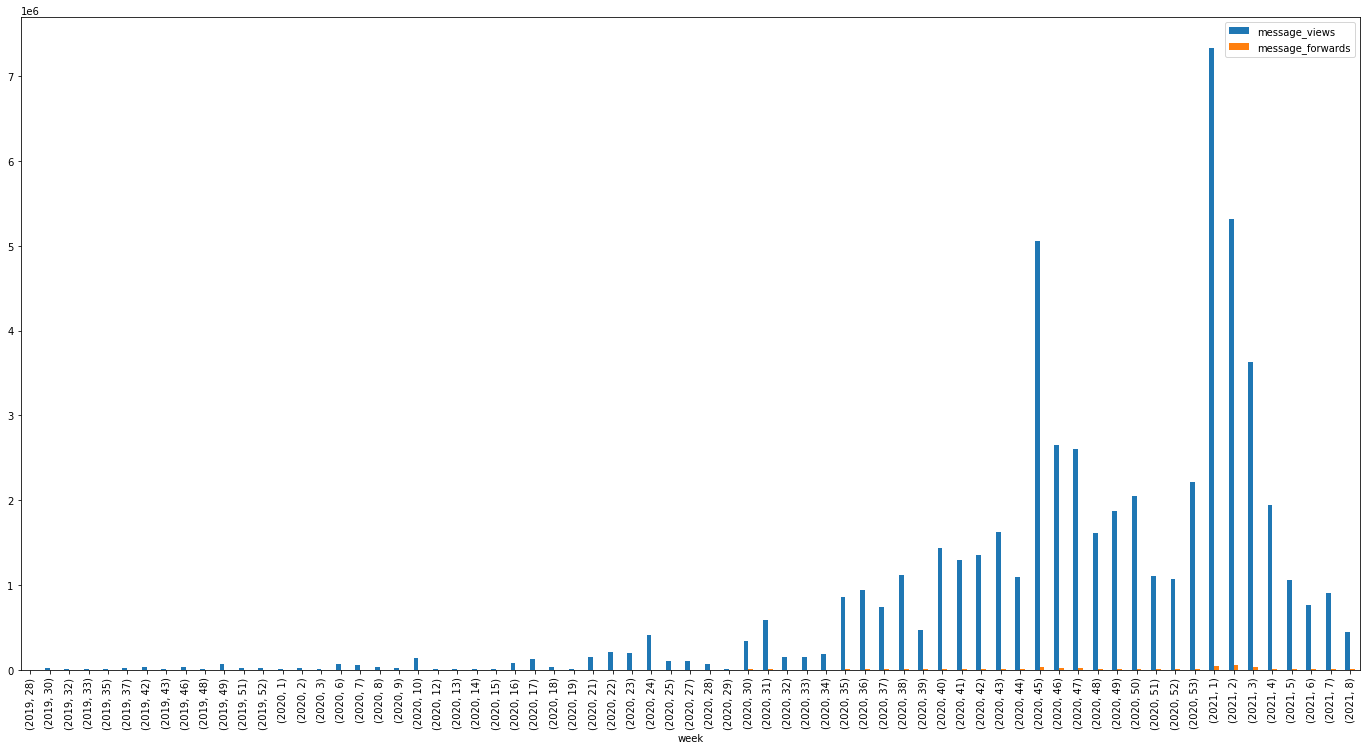

In [19]:
views_forwards_by_week(current_df)

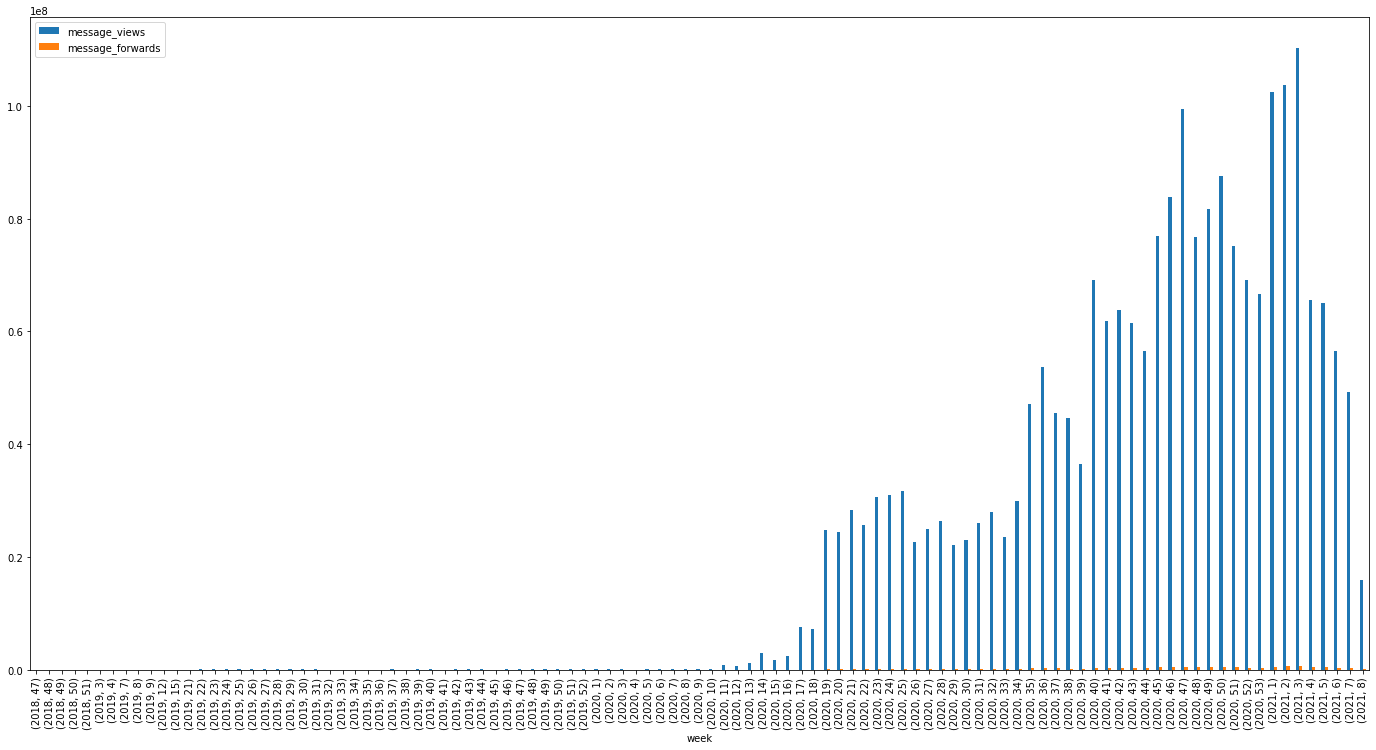

In [20]:
views_forwards_by_week(collection)

In [21]:
collection

,message_id,message_text,message_date,message_views,message_forwards,message_hasMedia,message_web_description,message_web_url,heritage
0,3889,Der unwiderlegbare Beweis kommt bald - wir sin...,2021-02-24 20:47:55+00:00,8638.0,38.0,True,The United States Supreme Court refused to rev...,https://ishort.ink/1f6y,MICHAELWENDLEROFFICIAL_24022021_223739.csv
1,3888,NaN,2021-02-24 20:36:24+00:00,10994.0,136.0,True,NaN,NaN,MICHAELWENDLEROFFICIAL_24022021_223739.csv
2,3887,💥💥💥\nhttps://www.kopp-verlag.de/a/die-plandemi...,2021-02-24 20:33:36+00:00,12660.0,1.0,True,"Von der Wahl des Virus über die Art, wie es ge...",https://www.kopp-verlag.de/a/die-plandemie?&6=...,MICHAELWENDLEROFFICIAL_24022021_223739.csv
3,3886,NaN,2021-02-24 20:33:27+00:00,12445.0,1.0,True,NaN,NaN,MICHAELWENDLEROFFICIAL_24022021_223739.csv
4,3885,Gestern fand ein Senatsausschuss zum Kapitol-E...,2021-02-24 20:25:36+00:00,9675.0,31.0,True,"🚨🚨🚨 Liebe Zuschauer, wir brauchen Ihre Hilfe! ...",https://www.youtube.com/watch?v=SNEhe_GwA-8&fe...,MICHAELWENDLEROFFICIAL_24022021_223739.csv
...,...,...,...,...,...,...,...,...,...
88242,5,NaN,2018-11-25 22:04:06+00:00,1911.0,6.0,True,NaN,NaN,verbindediepunkte_24022021_223622.csv
88243,4,"Advent,Ad!vent: http://berliner-express.com/20...",2018-11-25 21:46:18+00:00,1457.0,0.0,False,NaN,NaN,verbindediepunkte_24022021_223622.csv
88244,3,Mit 180 an die Wand: https://www.focus.de/poli...,2018-11-25 13:35:10+00:00,1413.0,1.0,True,Der Migrationspakt der Vereinten Nationen sorg...,https://www.focus.de/politik/deutschland/un-ab...,verbindediepunkte_24022021_223622.csv
88245,2,"Servus, hier ist der Sunny!",2018-11-25 13:34:18+00:00,1301.0,2.0,False,NaN,NaN,verbindediepunkte_24022021_223622.csv


In [22]:
# collection.to_csv('collection_01032021_170350.csv')